<a href="https://colab.research.google.com/github/ritwik007788/Machine-Learning-Algorithm/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder


In [ ]:
from sklearn.metrics import mean_squared_error , r2_score
import statsmodels.api as sm

In [ ]:
import pandas as pd

In [ ]:
from sklearn import linear_model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("aqi.csv")
data.head()

,Date,NO2,CO,O3,PM2.5,SO2,AQI Value,WIND,TEMP,PRESSURE,RH
0,01-01-2010,38.16,0.704,0.03348,13.526531,7.7,54,5.854167,46.000000,1030.041667,65.916667
1,02-01-2010,37.10,0.880,0.03996,14.953061,14.7,57,2.970833,44.000000,1028.208333,63.291667
2,03-01-2010,38.16,0.440,0.02484,15.428571,21.7,58,3.579167,44.041667,1025.833333,69.625000
3,04-01-2010,26.50,0.440,0.03348,10.800000,32.9,47,6.891667,41.750000,1031.208333,60.166667
4,05-01-2010,45.58,0.616,0.03348,15.904082,34.3,59,2.233333,37.333333,1032.125000,59.916667


In [ ]:
data.dtypes

Date           object
NO2           float64
CO            float64
O3            float64
PM2.5         float64
SO2           float64
 AQI Value      int64
WIND          float64
TEMP          float64
PRESSURE      float64
RH            float64
dtype: object

In [ ]:
data.info

<bound method DataFrame.info of            Date    NO2     CO  ...       TEMP     PRESSURE        RH 
0    01-01-2010  38.16  0.704  ...  46.000000  1030.041667  65.916667
1    02-01-2010  37.10  0.880  ...  44.000000  1028.208333  63.291667
2    03-01-2010  38.16  0.440  ...  44.041667  1025.833333  69.625000
3    04-01-2010  26.50  0.440  ...  41.750000  1031.208333  60.166667
4    05-01-2010  45.58  0.616  ...  37.333333  1032.125000  59.916667
..          ...    ...    ...  ...        ...          ...        ...
360  27-12-2010  40.28  1.232  ...  41.708333  1027.541667  71.708333
361  28-12-2010  28.62  0.440  ...  57.500000  1022.375000  75.750000
362  29-12-2010  44.52  0.528  ...  59.541667  1011.208333  87.208333
363  30-12-2010  31.80  0.528  ...  67.166667  1005.916667  85.666667
364  31-12-2010  29.68  0.528  ...  67.958333  1007.958333  71.041667

[365 rows x 11 columns]>

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.dtypes

Date          datetime64[ns]
NO2                  float64
CO                   float64
O3                   float64
PM2.5                float64
SO2                  float64
 AQI Value             int64
WIND                 float64
TEMP                 float64
PRESSURE             float64
RH                   float64
dtype: object

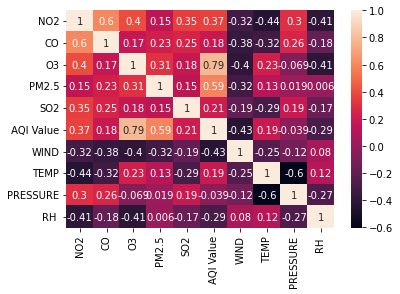

In [ ]:
corelation=data.corr()
sns.heatmap(corelation, xticklabels=corelation.columns,yticklabels=corelation.columns, annot=True)
#considers only numeric values i.e float and int

In [ ]:
data.columns

Index(['Date', 'NO2', 'CO', 'O3', 'PM2.5', 'SO2', ' AQI Value', 'WIND', 'TEMP',
       'PRESSURE', 'RH '],
      dtype='object')

In [ ]:
print(data[[' AQI Value','O3']].corr())
print(data[[' AQI Value','NO2']].corr())
print(data[[' AQI Value','PM2.5']].corr())
print(data[[' AQI Value','SO2']].corr())
print(data[[' AQI Value','CO']].corr())
print(data[[' AQI Value','TEMP']].corr())
print(data[[' AQI Value','PRESSURE']].corr())
print(data[[' AQI Value','WIND']].corr())
print(data[[' AQI Value','RH ']].corr())


             AQI Value        O3
 AQI Value    1.000000  0.790639
O3            0.790639  1.000000
             AQI Value       NO2
 AQI Value    1.000000  0.373292
NO2           0.373292  1.000000
             AQI Value     PM2.5
 AQI Value    1.000000  0.590689
PM2.5         0.590689  1.000000
             AQI Value       SO2
 AQI Value    1.000000  0.205725
SO2           0.205725  1.000000
             AQI Value        CO
 AQI Value    1.000000  0.184298
CO            0.184298  1.000000
             AQI Value      TEMP
 AQI Value    1.000000  0.189282
TEMP          0.189282  1.000000
             AQI Value  PRESSURE
 AQI Value    1.000000 -0.039216
PRESSURE     -0.039216  1.000000
             AQI Value      WIND
 AQI Value    1.000000 -0.427784
WIND         -0.427784  1.000000
             AQI Value       RH 
 AQI Value    1.000000 -0.289967
RH           -0.289967  1.000000


Best correlation with AQI is given by O3 , PM2.5,SO2,NO2


OUTLIER DETECTION USING INNER QUARTILE RANGE METHOD

In [ ]:
# find outlier in all columns
for i in data.select_dtypes(include=['float64','int64']).columns:
 max_thresold=data[i].quantile(0.95)
 min_thresold=data[i].quantile(0.05)
 data_no_outlier=data[(data[i] < max_thresold) &
(data[i] > min_thresold)].shape
 print(" outlier in ",i,"is" ,int(((data.shape[0]-
data_no_outlier[0])/data.shape[0])*100),"%")

 outlier in  NO2 is 11 %
 outlier in  CO is 11 %
 outlier in  O3 is 12 %
 outlier in  PM2.5 is 10 %
 outlier in  SO2 is 11 %
 outlier in   AQI Value is 13 %
 outlier in  WIND is 10 %
 outlier in  TEMP is 10 %
 outlier in  PRESSURE is 10 %
 outlier in  RH  is 10 %


In [ ]:
''' Detection '''
# IQR
Q1 = np.percentile(data['SO2'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['SO2'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)
 
# Upper bound
upper = np.where(data['SO2'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['SO2'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)

Old Shape:  (365, 11)
New Shape:  (351, 11)


In [ ]:
''' Detection '''
# IQR
Q1 = np.percentile(data['O3'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['O3'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)
 
# Upper bound
upper = np.where(data['O3'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['O3'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)

Old Shape:  (351, 11)
New Shape:  (340, 11)


In [ ]:
''' Detection '''
# IQR
Q1 = np.percentile(data['PM2.5'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['PM2.5'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)
 
# Upper bound
upper = np.where(data['PM2.5'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['PM2.5'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)

Old Shape:  (340, 11)
New Shape:  (330, 11)


In [ ]:
''' Detection '''
# IQR
Q1 = np.percentile(data['NO2'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['NO2'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)
 
# Upper bound
upper = np.where(data['NO2'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['NO2'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)

Old Shape:  (330, 11)
New Shape:  (324, 11)


CREATING MODEL

In [ ]:
X = data[['NO2','O3','PM2.5','SO2']]
y = data[[' AQI Value']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(X_train,y_train)
#fitting is done on training data

LinearRegression()

In [ ]:
y_prediction =  LR.predict(X_test)
y_prediction

array([[ 69.71910802],
       [ 81.49738051],
       [ 86.08789732],
       [ 66.32123152],
       [ 99.40348009],
       [118.13891301],
       [ 46.14276037],
       [ 92.39225257],
       [ 28.42000875],
       [ 53.03498576],
       [109.42004358],
       [ 97.49513982],
       [ 79.63835092],
       [ 60.63509232],
       [ 68.35575668],
       [ 60.9688059 ],
       [ 61.05691959],
       [ 29.87126777],
       [ 26.55185141],
       [ 64.6768085 ],
       [ 62.96759696],
       [ 97.61839925],
       [ 63.38812168],
       [ 89.08120585],
       [ 84.72158787],
       [ 40.66859919],
       [115.10393878],
       [ 51.65918636],
       [ 47.78220057],
       [ 49.80302419],
       [ 94.18651528],
       [106.97318788],
       [ 68.30325238],
       [ 56.6130934 ],
       [ 40.04205865],
       [ 51.109748  ],
       [ 87.71565731],
       [ 32.56176913],
       [ 59.33376892],
       [109.45541307],
       [ 39.69327326],
       [ 44.77547103],
       [ 51.09915406],
       [ 67

In [ ]:
print("Intercept : " , LR.intercept_)
print("Slope : " , LR.coef_)

Intercept :  [-27.29899216]
Slope :  [[ 1.48659238e-01  1.12193171e+03  2.64737395e+00 -1.40532827e-01]]


**MSE**

In [ ]:
error = y_test - y_prediction
se = np.sum(error**2)


print('squared error is : ',se)

squared error is :   AQI Value    11890.158625
dtype: float64


In [ ]:
mse = se/365

In [ ]:
mse

 AQI Value    32.575777
dtype: float64

In [ ]:
#MSE CORRECT METHOD

In [ ]:
difference_array = np.subtract(y_test,y_prediction)
squared_array = np.square(difference_array)
mse = squared_array.mean()

print(mse)

 AQI Value    182.925517
dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_prediction)

182.92551731014555

In [ ]:
MSE = np.square(np.subtract(y_test,y_prediction)).mean()
MSE

 AQI Value    182.925517
dtype: float64

ACCURACY

In [ ]:
from sklearn.metrics import r2_score , mean_squared_error
score = r2_score(y_test , y_prediction)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%".format(score * 100))

R2 Score : 0.7360777858779288
Model Accuracy: 73.60777858779288%


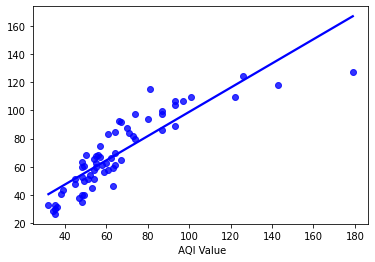

In [ ]:
sns.regplot(x=y_test, y=y_prediction, ci=None, color="b")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


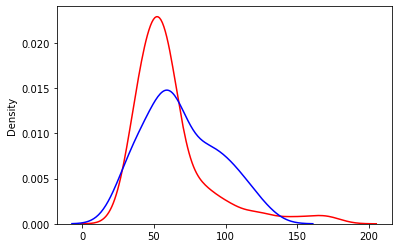

In [ ]:
import seaborn as sns

ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_prediction, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [ ]:
sns.pairplot(data)

Error in callback <function flush_figures at 0x7f1efbac20e0> (for post_execute):


KeyboardInterrupt: ignored